# Import Toolkits  

In [74]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 
import plotly.express as px

In [75]:
import warnings
warnings.filterwarnings("ignore", category=RuntimeWarning)
warnings.filterwarnings("ignore", category=FutureWarning)

# Import the data set 

In [77]:
df = pd.read_csv("../assets/house_pricing/train.csv")
df.head(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2008,WD,Normal,118000


# Getting a first look at the data

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [17]:
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


### <span style="color:red">First insight:</span> If the values in the columns are normally distributed, the closer the mean is to the median (the 50th percentile or 2nd quartile), the closer the data is to a normal distribution.

### <span style="color:red">Insight:</span> Most houses in this dataset are priced between 129K and 214K, which corresponds to the **interquartile range (between the 1st and 3rd quartile)**.


# Pre_processing


## Missing values

### Getting the columns with more than 50% NaN values


In [18]:
(df.isna().sum().sort_values().tail(10) / len(df)) * 100

GarageYrBlt     5.547945
GarageType      5.547945
GarageCond      5.547945
LotFrontage    17.739726
FireplaceQu    47.260274
MasVnrType     59.726027
Fence          80.753425
Alley          93.767123
MiscFeature    96.301370
PoolQC         99.520548
dtype: float64

### Drop the columns that have a ratio of NaN values higher than 50%.


In [19]:
df.drop(columns = ['MasVnrType','Fence','Alley','MiscFeature','PoolQC'],inplace = True )

In [20]:

df.shape

(1460, 76)

In [21]:
(df.isna().sum().sort_values().tail(10) / len(df)) * 100

BsmtFinType1     2.534247
BsmtFinType2     2.602740
BsmtExposure     2.602740
GarageYrBlt      5.547945
GarageQual       5.547945
GarageCond       5.547945
GarageType       5.547945
GarageFinish     5.547945
LotFrontage     17.739726
FireplaceQu     47.260274
dtype: float64

### Let's first examine the `FireplaceQu` column and try to fill the missing values by referring to the Dataset Description.


### The `FireplaceQu` column (Fireplace Quality) is directly related to the `Fireplaces` column (Number of Fireplaces).


### Let's create a copy of these two columns to work on, so we don't alter the original DataFrame.

In [22]:
fire_mask = []
for i in df.columns:
    if i.startswith("Fire"):
        fire_mask.append(i)

fire_mask = df[fire_mask]

In [23]:
fire_mask

,Fireplaces,FireplaceQu
0,0,NaN
1,1,TA
2,1,TA
3,1,Gd
4,1,TA
...,...,...
1455,1,TA
1456,2,TA
1457,2,Gd
1458,0,NaN


In [24]:
fire_mask[fire_mask['FireplaceQu'].isna()]

,Fireplaces,FireplaceQu
0,0,NaN
5,0,NaN
10,0,NaN
12,0,NaN
15,0,NaN
...,...,...
1452,0,NaN
1453,0,NaN
1454,0,NaN
1458,0,NaN


In [25]:
fire_mask[fire_mask['FireplaceQu'].isna()]['Fireplaces'].sum()

0

### <span style="color:red">Insight:</span> All NaN values occur because there are **0 fireplaces** in those houses.


In [26]:

fire_mask['FireplaceQu'].unique()

array([nan, 'TA', 'Gd', 'Fa', 'Ex', 'Po'], dtype=object)

### To avoid rewriting the code for filling missing values, we'll create a function that fills them using a specified impute value.


In [27]:
def fill_missing(column , value ):
    if column in df.columns :
        df.fillna({ column : value } , inplace = True)
        print(f"Missing values in column {column} is replaced by {value}")
    else :
        print(f"column {column} does not exist")

In [28]:
fill_missing('FireplaceQu', "Zero")


Missing values in column FireplaceQu is replaced by Zero


In [29]:
(df.isna().sum().sort_values().tail(10) / len(df)) * 100

BsmtCond         2.534247
BsmtFinType1     2.534247
BsmtExposure     2.602740
BsmtFinType2     2.602740
GarageFinish     5.547945
GarageQual       5.547945
GarageCond       5.547945
GarageYrBlt      5.547945
GarageType       5.547945
LotFrontage     17.739726
dtype: float64

### The following columns have the **same percentage of missing values**, which indicates a relationship between their missing entries:

| Column Name   | % of Missing Values |
|----------------|---------------------|
| GarageFinish   | 5.547945% |
| GarageQual     | 5.547945% |
| GarageCond     | 5.547945% |
| GarageYrBlt    | 5.547945% |
| GarageType     | 5.547945% |


### We'll apply the same approach as we did for the fireplaces.


In [30]:
garage_mask = []
for i in df.columns :
    if i.startswith("Garage"):
        garage_mask.append(i)
garage_mask
    

['GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageCars',
 'GarageArea',
 'GarageQual',
 'GarageCond']

In [31]:
garage_mask= df[garage_mask]
garage_mask

,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond
0,Attchd,2003.0,RFn,2,548,TA,TA
1,Attchd,1976.0,RFn,2,460,TA,TA
2,Attchd,2001.0,RFn,2,608,TA,TA
3,Detchd,1998.0,Unf,3,642,TA,TA
4,Attchd,2000.0,RFn,3,836,TA,TA
...,...,...,...,...,...,...,...
1455,Attchd,1999.0,RFn,2,460,TA,TA
1456,Attchd,1978.0,Unf,2,500,TA,TA
1457,Attchd,1941.0,RFn,1,252,TA,TA
1458,Attchd,1950.0,Unf,1,240,TA,TA


In [32]:
garage_mask[garage_mask["GarageType"].isna()]

,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond
39,NaN,NaN,NaN,0,0,NaN,NaN
48,NaN,NaN,NaN,0,0,NaN,NaN
78,NaN,NaN,NaN,0,0,NaN,NaN
88,NaN,NaN,NaN,0,0,NaN,NaN
89,NaN,NaN,NaN,0,0,NaN,NaN
...,...,...,...,...,...,...,...
1349,NaN,NaN,NaN,0,0,NaN,NaN
1407,NaN,NaN,NaN,0,0,NaN,NaN
1449,NaN,NaN,NaN,0,0,NaN,NaN
1450,NaN,NaN,NaN,0,0,NaN,NaN


### Making sure that all values in these columns — `GarageCars` and `GarageArea` — are zeros.


In [33]:
garage_mask[garage_mask["GarageType"].isna()][['GarageCars','GarageArea']].sum()

GarageCars    0
GarageArea    0
dtype: int64

### <span style="color:red">Insight:</span> Based on the Dataset Description:
- **`GarageType`**: Garage location  
- **`GarageYrBlt`**: Year the garage was built  
- **`GarageFinish`**: Interior finish of the garage  
- **`GarageCars`**: Size of the garage in car capacity  
- **`GarageArea`**: Size of the garage in square feet  
- **`GarageQual`**: Garage quality  
- **`GarageCond`**: Garage condition  

This indicates that the missing values in these columns exist because **those houses do not have a garage**.

In [34]:
garage_mask.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   GarageType    1379 non-null   object 
 1   GarageYrBlt   1379 non-null   float64
 2   GarageFinish  1379 non-null   object 
 3   GarageCars    1460 non-null   int64  
 4   GarageArea    1460 non-null   int64  
 5   GarageQual    1379 non-null   object 
 6   GarageCond    1379 non-null   object 
dtypes: float64(1), int64(2), object(4)
memory usage: 80.0+ KB


In [35]:
fill_missing('GarageType', "NF")
fill_missing('GarageFinish', "NF")
fill_missing('GarageQual', "NF")
fill_missing('GarageCond', "NF")
fill_missing('GarageYrBlt', 0)
fill_missing('GarageCars', 0)
fill_missing('GarageArea', 0)

Missing values in column GarageType is replaced by NF
Missing values in column GarageFinish is replaced by NF
Missing values in column GarageQual is replaced by NF
Missing values in column GarageCond is replaced by NF
Missing values in column GarageYrBlt is replaced by 0
Missing values in column GarageCars is replaced by 0
Missing values in column GarageArea is replaced by 0


In [36]:
(df.isna().sum().sort_values().tail(10) / len(df)) * 100

RoofMatl         0.000000
ExterQual        0.000000
Electrical       0.068493
MasVnrArea       0.547945
BsmtQual         2.534247
BsmtFinType1     2.534247
BsmtCond         2.534247
BsmtExposure     2.602740
BsmtFinType2     2.602740
LotFrontage     17.739726
dtype: float64

### We'll now try to understand the following columns and their missing values:

| Column Name   | % of Missing Values |
|----------------|---------------------|
| BsmtQual       | 2.53% |
| BsmtFinType1   | 2.53% |
| BsmtCond       | 2.53% |
| BsmtExposure   | 2.60% |
| BsmtFinType2   | 2.60% |


In [37]:
Bsmnt_mask = []
for i in df.columns :
    if i.startswith("Bsmt"):
        Bsmnt_mask.append(i)
Bsmnt_mask

['BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinSF1',
 'BsmtFinType2',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'BsmtFullBath',
 'BsmtHalfBath']

In [38]:
Bsmnt_mask= df[Bsmnt_mask]
Bsmnt_mask

,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,BsmtFullBath,BsmtHalfBath
0,Gd,TA,No,GLQ,706,Unf,0,150,1,0
1,Gd,TA,Gd,ALQ,978,Unf,0,284,0,1
2,Gd,TA,Mn,GLQ,486,Unf,0,434,1,0
3,TA,Gd,No,ALQ,216,Unf,0,540,1,0
4,Gd,TA,Av,GLQ,655,Unf,0,490,1,0
...,...,...,...,...,...,...,...,...,...,...
1455,Gd,TA,No,Unf,0,Unf,0,953,0,0
1456,Gd,TA,No,ALQ,790,Rec,163,589,1,0
1457,TA,Gd,No,GLQ,275,Unf,0,877,0,0
1458,TA,TA,Mn,GLQ,49,Rec,1029,0,1,0


In [39]:
Bsmnt_mask.isna().sum()

BsmtQual        37
BsmtCond        37
BsmtExposure    38
BsmtFinType1    37
BsmtFinSF1       0
BsmtFinType2    38
BsmtFinSF2       0
BsmtUnfSF        0
BsmtFullBath     0
BsmtHalfBath     0
dtype: int64

### Only the `BsmtExposure` column contains NaN values, while the other basement-related columns are complete.


In [40]:
Bsmnt_mask[(Bsmnt_mask['BsmtExposure'].isna()) & (Bsmnt_mask['BsmtCond'].isna()== False)]

,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,BsmtFullBath,BsmtHalfBath
948,Gd,TA,NaN,Unf,0,Unf,0,936,0,0


### Only this column’s missing value is not related to the others, so we'll fill it with the mode since its data type is **object (string)**.



In [41]:
BsmtExposure_mode = df['BsmtExposure'].mode()[0]
BsmtExposure_mode

'No'

In [42]:
df.loc[948 , 'BsmtExposure']= BsmtExposure_mode

### Only the `BsmtFinType2` column contains NaN values, while the other basement-related columns are complete.

In [43]:
Bsmnt_mask[(Bsmnt_mask['BsmtFinType2'].isna()) & (Bsmnt_mask['BsmtCond'].isna()== False)]

,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,BsmtFullBath,BsmtHalfBath
332,Gd,TA,No,GLQ,1124,NaN,479,1603,1,0


### Only this column’s missing value is not related to the others, so we'll fill it with the mode since its data type is **object (string)**.


In [44]:
BsmtFinType2_mode = df['BsmtFinType2'].mode()[0]
df.loc[332 , 'BsmtFinType2']= BsmtFinType2_mode

In [45]:
df.loc[332 , 'BsmtFinType2']

'Unf'

### Now, I'll update the masked DataFrame.


In [46]:
Bsmnt_mask = []
for i in df.columns :
    if i.startswith("Bsmt"):
        Bsmnt_mask.append(i)

Bsmnt_mask= df[Bsmnt_mask]
Bsmnt_mask.isna().sum()

BsmtQual        37
BsmtCond        37
BsmtExposure    37
BsmtFinType1    37
BsmtFinSF1       0
BsmtFinType2    37
BsmtFinSF2       0
BsmtUnfSF        0
BsmtFullBath     0
BsmtHalfBath     0
dtype: int64

In [47]:
Bsmnt_mask[Bsmnt_mask["BsmtQual"].isna()][['BsmtFinSF1','BsmtFinSF2']].sum()

BsmtFinSF1    0
BsmtFinSF2    0
dtype: int64

### <span style="color:red">Insight:</span> Based on the Dataset Description:

- **`BsmtQual`**: Height of the basement  
- **`BsmtCond`**: General condition of the basement  
- **`BsmtExposure`**: Walkout or garden level basement walls  
- **`BsmtFinType1`**: Quality of basement finished area  
- **`BsmtFinSF1`**: Type 1 finished square feet  
- **`BsmtFinType2`**: Quality of second finished area (if present)  
- **`BsmtFinSF2`**: Type 2 finished square feet  
- **`BsmtUnfSF`**: Unfinished square feet of basement area  

This indicates that the missing values in these columns exist because **those houses do not have a basement**.


In [48]:
Bsmnt_mask.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   BsmtQual      1423 non-null   object
 1   BsmtCond      1423 non-null   object
 2   BsmtExposure  1423 non-null   object
 3   BsmtFinType1  1423 non-null   object
 4   BsmtFinSF1    1460 non-null   int64 
 5   BsmtFinType2  1423 non-null   object
 6   BsmtFinSF2    1460 non-null   int64 
 7   BsmtUnfSF     1460 non-null   int64 
 8   BsmtFullBath  1460 non-null   int64 
 9   BsmtHalfBath  1460 non-null   int64 
dtypes: int64(5), object(5)
memory usage: 114.2+ KB


In [49]:
fill_missing('BsmtQual', "NF")
fill_missing('BsmtCond', "NF")
fill_missing('BsmtExposure', "NF")
fill_missing('BsmtFinType1', "NF")
fill_missing('BsmtFinType2', "NF")


Missing values in column BsmtQual is replaced by NF
Missing values in column BsmtCond is replaced by NF
Missing values in column BsmtExposure is replaced by NF
Missing values in column BsmtFinType1 is replaced by NF
Missing values in column BsmtFinType2 is replaced by NF


### Now, I’ll handle the individual columns separately.

In [50]:
(df.isna().sum().sort_values().tail(10) / len(df)) * 100

ExterCond       0.000000
ExterQual       0.000000
Exterior2nd     0.000000
Exterior1st     0.000000
RoofMatl        0.000000
Foundation      0.000000
SalePrice       0.000000
Electrical      0.068493
MasVnrArea      0.547945
LotFrontage    17.739726
dtype: float64

In [51]:
df[df['Electrical'].isna()]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1379,1380,80,RL,73.0,9735,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,5,2008,WD,Normal,167500


In [52]:
df['Electrical'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 1460 entries, 0 to 1459
Series name: Electrical
Non-Null Count  Dtype 
--------------  ----- 
1459 non-null   object
dtypes: object(1)
memory usage: 11.5+ KB


### <span style="color:red">Insight:</span> There is only one missing value, so we'll fill it with the mode since the data type is **object (string)**.


In [53]:
Electrical_mode = df['Electrical'].mode()[0]
df.loc[1379 , 'Electrical']= Electrical_mode

In [54]:
(df.isna().sum().sort_values().tail(10) / len(df)) * 100

Foundation      0.000000
ExterCond       0.000000
ExterQual       0.000000
Exterior2nd     0.000000
Exterior1st     0.000000
RoofMatl        0.000000
BsmtQual        0.000000
SalePrice       0.000000
MasVnrArea      0.547945
LotFrontage    17.739726
dtype: float64

In [55]:
df['MasVnrArea'].describe()

count    1452.000000
mean      103.685262
std       181.066207
min         0.000000
25%         0.000000
50%         0.000000
75%       166.000000
max      1600.000000
Name: MasVnrArea, dtype: float64

<Axes: xlabel='MasVnrArea', ylabel='Count'>

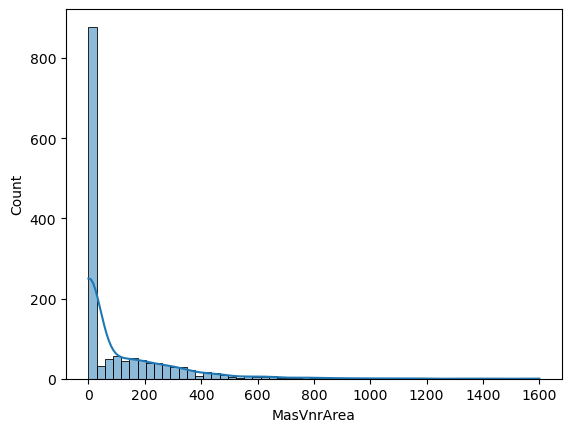

In [56]:
sns.histplot(df, x = 'MasVnrArea', kde= True)

In [57]:
(df['MasVnrArea'].value_counts()/len(df))*100

MasVnrArea
0.0      58.972603
180.0     0.547945
72.0      0.547945
108.0     0.547945
120.0     0.479452
           ...    
562.0     0.068493
89.0      0.068493
921.0     0.068493
762.0     0.068493
119.0     0.068493
Name: count, Length: 327, dtype: float64

### <span style="color:red">Insight:</span> The percentage of zeros in this column is over **58%**, so we'll fill the **8 missing values** with **0 (the median)**.


In [58]:
df['MasVnrArea'].fillna(df['MasVnrArea'].median(), inplace= True)

In [59]:
(df.isna().sum().sort_values().tail(10) / len(df)) * 100

Foundation      0.000000
ExterCond       0.000000
ExterQual       0.000000
MasVnrArea      0.000000
Exterior2nd     0.000000
Exterior1st     0.000000
RoofMatl        0.000000
BsmtQual        0.000000
SalePrice       0.000000
LotFrontage    17.739726
dtype: float64

In [60]:
Lot_mask = []
for i in df.columns :
    if i.startswith("Lot"):
        Lot_mask.append(i)

Lot_mask= df[Lot_mask]
Lot_mask.isna().sum()

LotFrontage    259
LotArea          0
LotShape         0
LotConfig        0
dtype: int64

In [61]:
Lot_mask[Lot_mask['LotFrontage'].isna()]

,LotFrontage,LotArea,LotShape,LotConfig
7,NaN,10382,IR1,Corner
12,NaN,12968,IR2,Inside
14,NaN,10920,IR1,Corner
16,NaN,11241,IR1,CulDSac
24,NaN,8246,IR1,Inside
...,...,...,...,...
1429,NaN,12546,IR1,Corner
1431,NaN,4928,IR1,Inside
1441,NaN,4426,Reg,Inside
1443,NaN,8854,Reg,Inside


<Axes: xlabel='LotFrontage', ylabel='Count'>

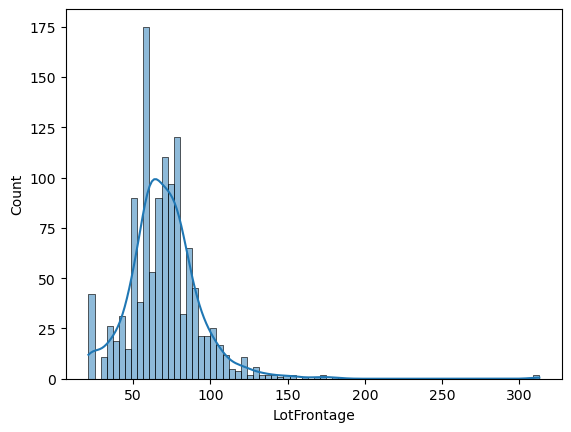

In [62]:
sns.histplot(df, x = 'LotFrontage', kde= True)

### <span style="color:red">Insight:</span> Based on the Dataset Description:

- **`LotFrontage`**: Linear feet of street connected to the property  
- **`LotArea`**: Lot size in square feet  
- **`LotShape`**: General shape of the property  

There is no reliable way to determine the `LotFrontage` value, so we'll fill it with the **mean**, since it is **normally distributed**.


In [63]:
LotFrontage_mean = df['LotFrontage'].mean()
fill_missing('LotFrontage', LotFrontage_mean)

Missing values in column LotFrontage is replaced by 70.04995836802665


In [64]:
(df.isna().sum().sort_values().tail(10) / len(df)) * 100

BsmtQual       0.0
ExterCond      0.0
ExterQual      0.0
MasVnrArea     0.0
Exterior2nd    0.0
Exterior1st    0.0
RoofMatl       0.0
RoofStyle      0.0
Foundation     0.0
SalePrice      0.0
dtype: float64

### Finally, there are no missing values remaining in the dataset.

## Analysis

In [65]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 76 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1460 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

### I'll perform feature engineering by replacing the `YearBuilt` column with a new column called `Age` to make the data easier to interpret.


In [66]:
df['YearBuilt'].corr(df['SalePrice'])

0.5228973328794969

In [67]:
df["Age"]= 2025 -df['YearBuilt']

In [68]:
df.drop(columns = ['YearBuilt'], inplace = True)

In [69]:
df['Age'].corr(df['SalePrice'])

-0.5228973328794969

### I'll plot a heatmap to visualize the correlation among all numerical features in the dataset.


In [70]:
num_columns = df.select_dtypes(exclude = 'object')
num_columns

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,Age
0,1,60,65.0,8450,7,5,2003,196.0,706,0,...,61,0,0,0,0,0,2,2008,208500,22
1,2,20,80.0,9600,6,8,1976,0.0,978,0,...,0,0,0,0,0,0,5,2007,181500,49
2,3,60,68.0,11250,7,5,2002,162.0,486,0,...,42,0,0,0,0,0,9,2008,223500,24
3,4,70,60.0,9550,7,5,1970,0.0,216,0,...,35,272,0,0,0,0,2,2006,140000,110
4,5,60,84.0,14260,8,5,2000,350.0,655,0,...,84,0,0,0,0,0,12,2008,250000,25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,62.0,7917,6,5,2000,0.0,0,0,...,40,0,0,0,0,0,8,2007,175000,26
1456,1457,20,85.0,13175,6,6,1988,119.0,790,163,...,0,0,0,0,0,0,2,2010,210000,47
1457,1458,70,66.0,9042,7,9,2006,0.0,275,0,...,60,0,0,0,0,2500,5,2010,266500,84
1458,1459,20,68.0,9717,5,6,1996,0.0,49,1029,...,0,112,0,0,0,0,4,2010,142125,75


In [71]:
corr= num_columns.corr()

<Axes: >

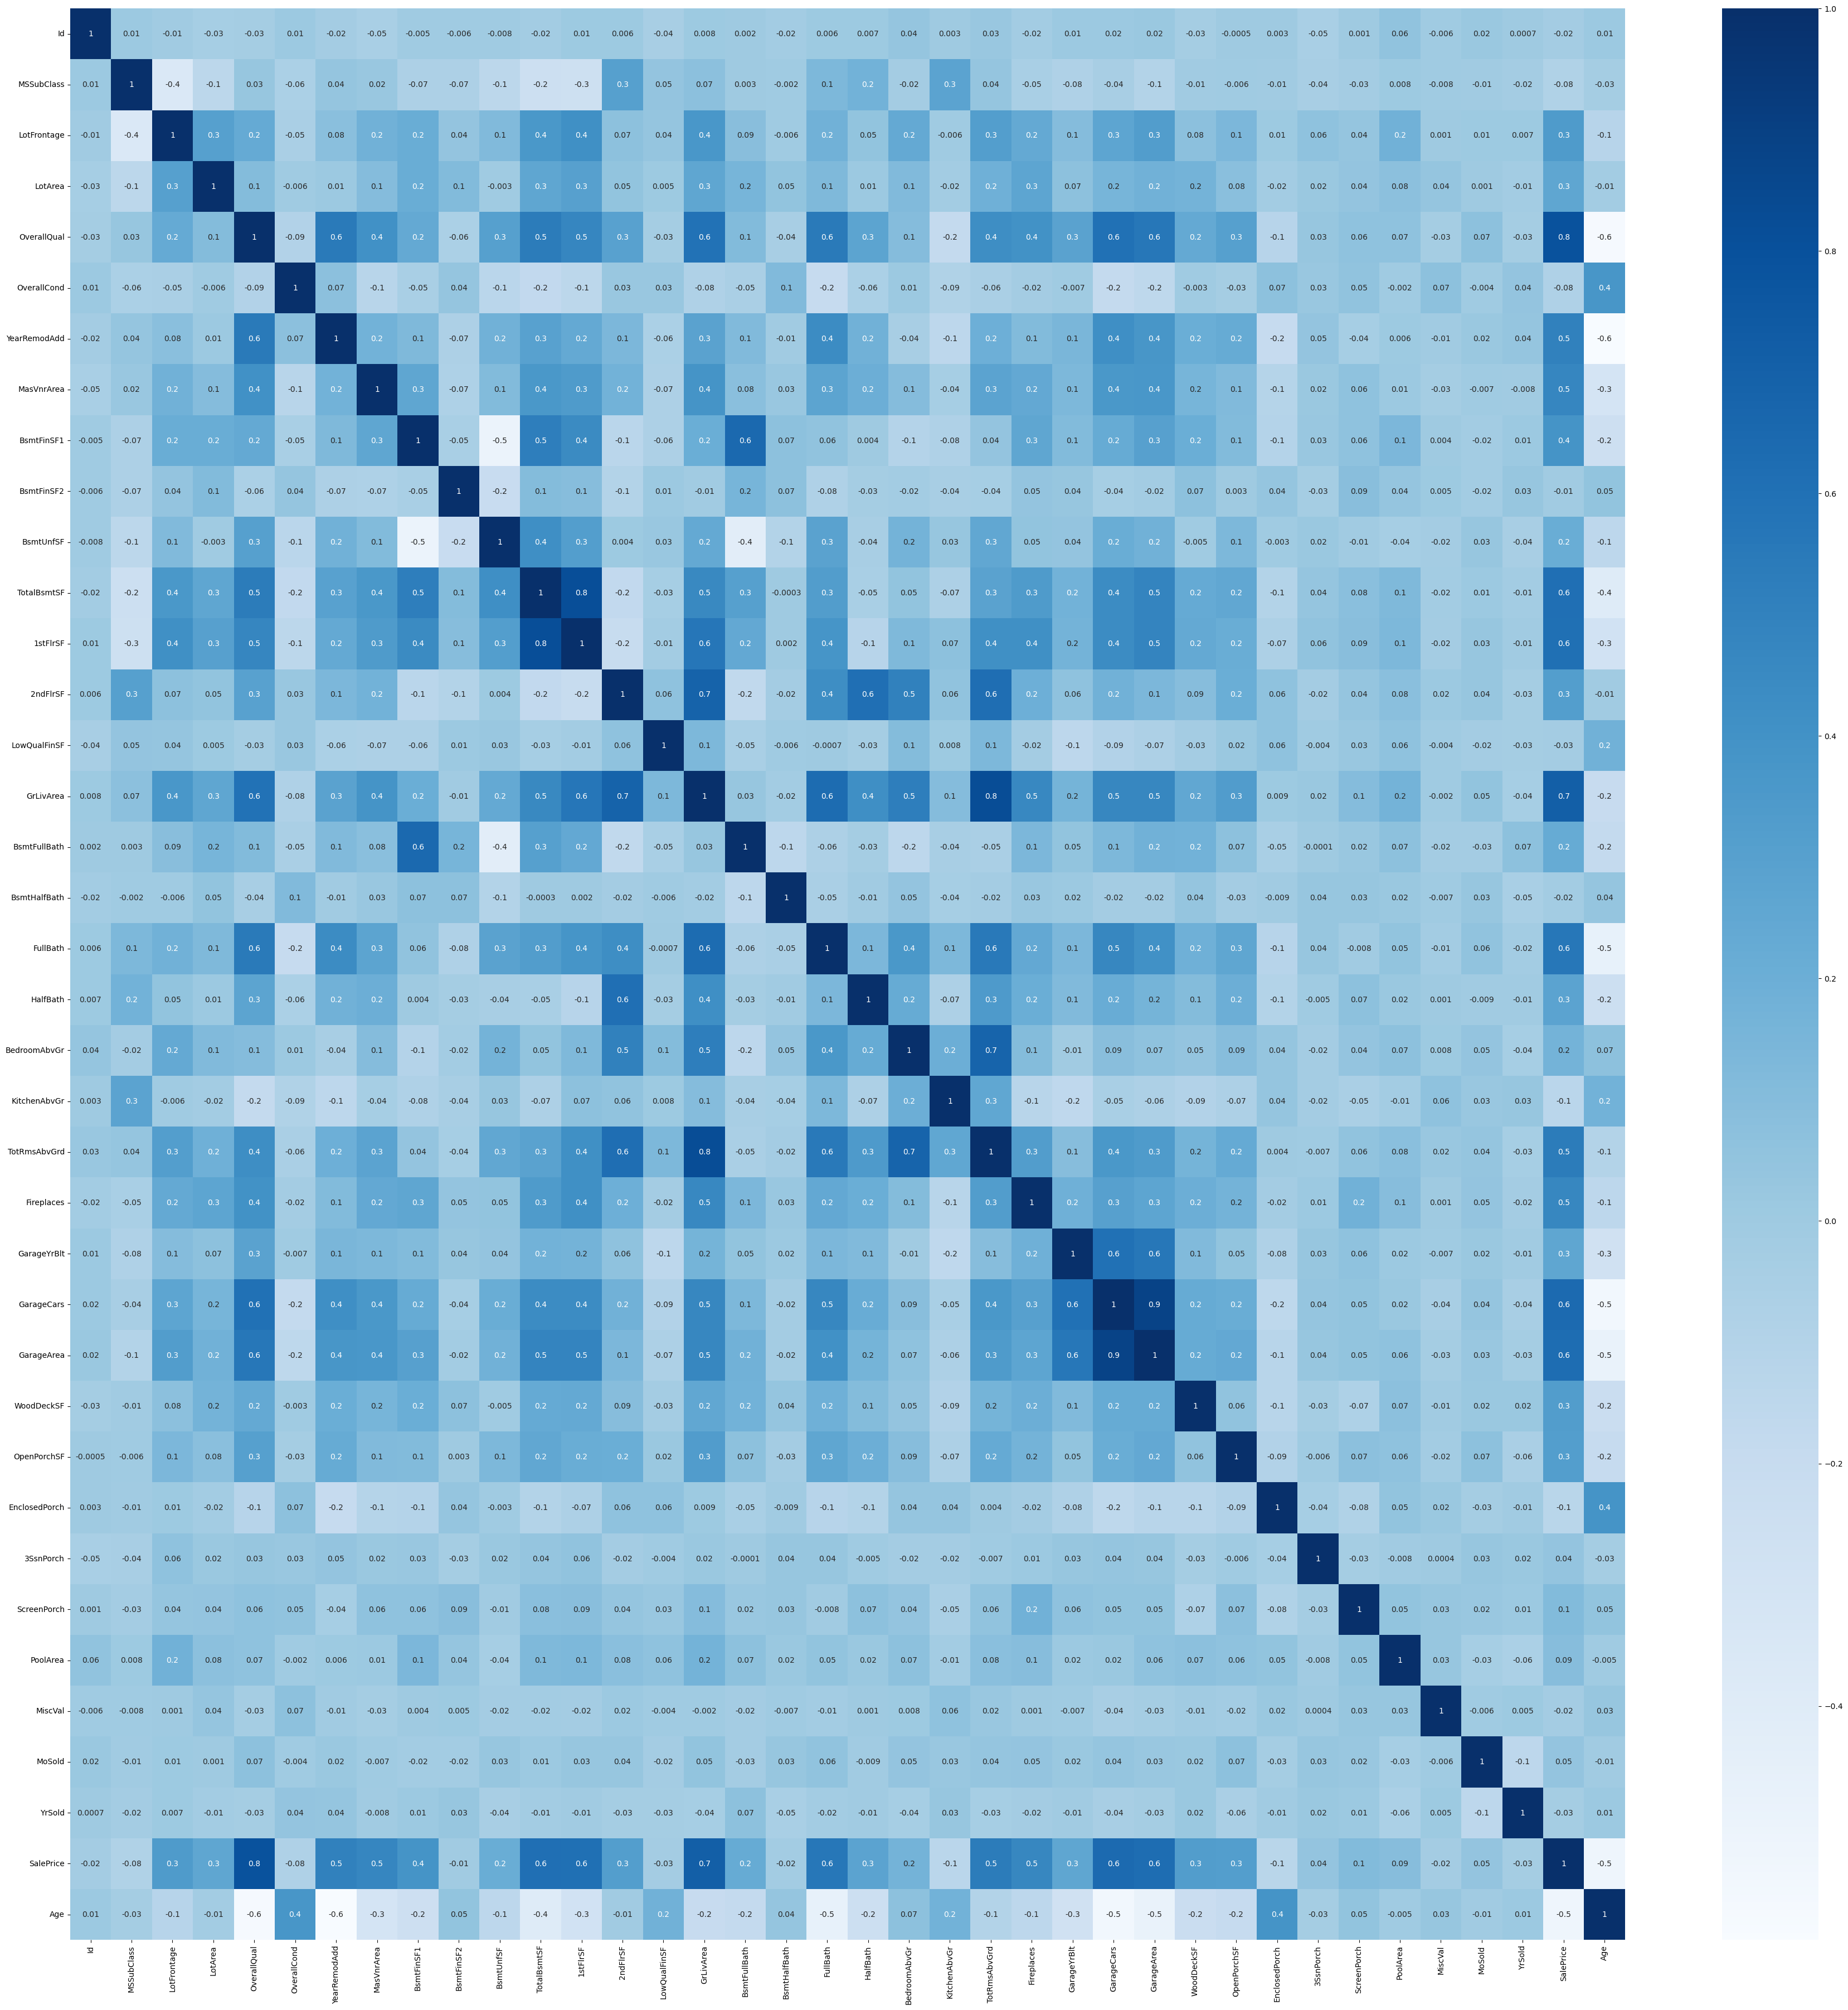

In [72]:
plt.figure(figsize = (45,45))
sns.heatmap(corr,annot= True, fmt ='.1g',cmap = 'Blues')

In [73]:
corr = num_columns.corr()['SalePrice'].drop('SalePrice').sort_values(ascending=False)

fig = px.bar(
    x=corr.index,
    y=corr.values,
    title="Correlation with SalePrice",
    labels={'x': 'Features', 'y': 'Correlation'},
    color=corr.values,
    color_continuous_scale='RdYlGn'
)

fig.show()


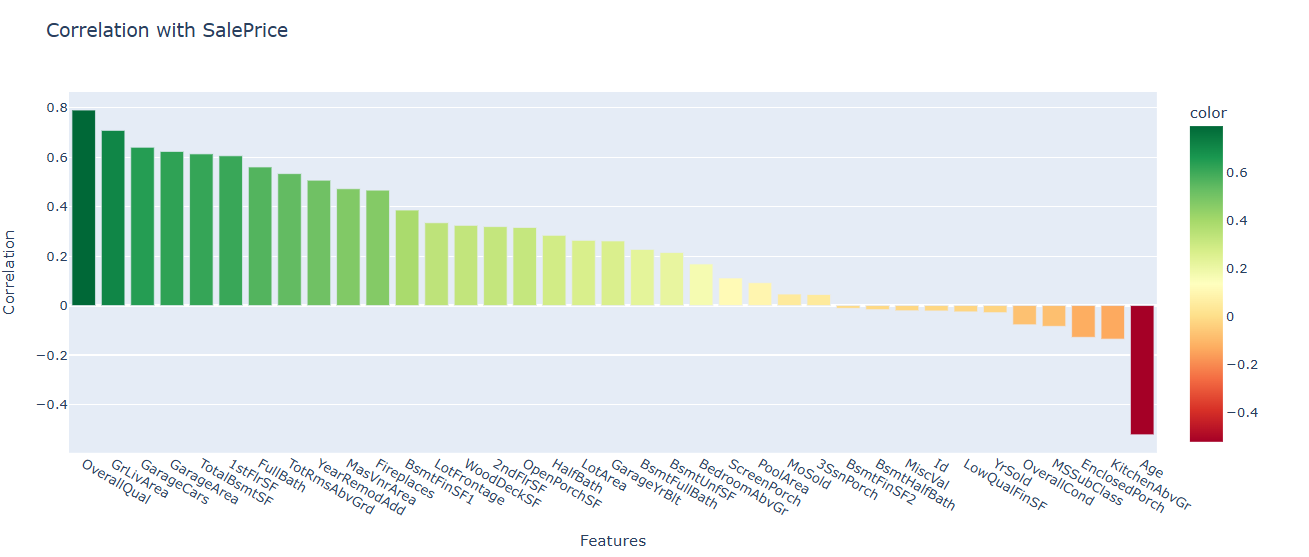
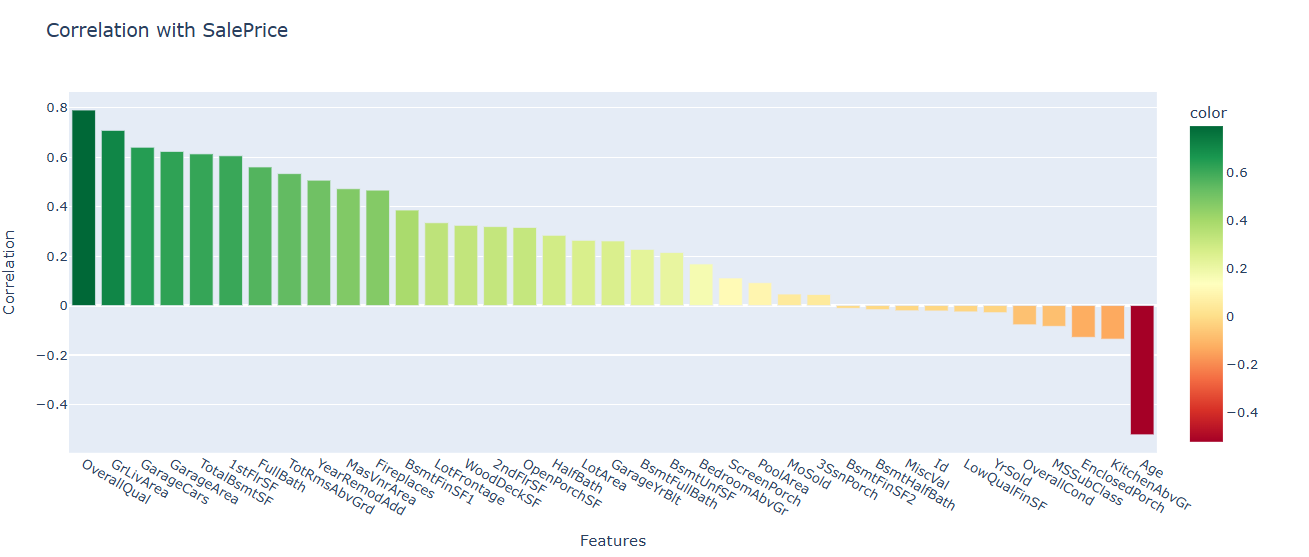

### <span style="color:red">**Insight**:</span>  
The correlation analysis with `SalePrice` reveals that **Overall Quality (`OverallQual`)** and **Above Ground Living Area (`GrLivArea`)** are the most influential features, both showing strong positive correlations with sale price. This indicates that houses with better overall quality and larger living areas tend to sell for significantly higher prices.  

Garage-related features (`GarageCars`, `GarageArea`), total basement area (`TotalBsmtSF`), and the number of full bathrooms (`FullBath`) also demonstrate moderate positive correlations, suggesting they contribute meaningfully to property value.  

On the other hand, **`Age`** shows a **negative correlation**, meaning newer houses tend to have higher sale prices, while **`KitchenAbvGr`** (number of kitchens above ground) also correlates negatively—likely because multiple kitchens are uncommon and may indicate non-standard or older layouts.  
